# Naive Bayes - Stock Sentiment Classification

This notebook explores the possibility of classifying if stocks of a particular company will go up or down, dependent on top news headlines.

Target:
- 0--> Stocks will go up
- 1--> Stocks will go down

In [1]:
filename = 'stock-sentiment-data.csv'

In [2]:
#https://www.kaggle.com/geminikeggler/stock-sentiment-analysis

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded')
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [3]:
#Import python packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [4]:
#Import the stock sentiment analysis data
data = getDataset(filename, encoding='ISO-8859-1', index_col = [0])
data.shape

stock-sentiment-data.csv already exists


(4101, 27)

In [5]:
#Display first 5 lines of data
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [6]:
#Display last 5 lines of data
data.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
4097,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4098,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
4100,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

## Data Preprocessing Required for Text Data

In [24]:
import nltk
from nltk.corpus import stopwords
list_stopwords = stopwords.words('english')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
text_data.iloc[0, 2]

'a  hindrance to operations   extracts from the leaked reports'

In [40]:
' '.join([y for y in [x for x in text_data.iloc[0, 2].split()] if y not in list_stopwords])

'hindrance operations extracts leaked reports'

In [30]:
number_of_headlines = 25
text_data = data.copy()

# Convert all text to lowercase
text_data = text_data.apply(lambda x: x.astype(str).str.lower())

# Remove punctuation and garbage
text_data.iloc[:, 2:].replace("[^a-zA-Z]"," ",regex=True, inplace=True)
text_data.iloc[:, 2:].replace("^b ","",regex=True, inplace=True)

# Rename columns
text_data.columns= [x for x in text_data.columns[:2]] + [str(i) for i in [i for i in range(number_of_headlines)]]

text_data

/home/ivan/.local/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Date,Label,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,2000-01-03,0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,2000-01-04,0,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,2000-01-05,0,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,...,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,2000-01-06,1,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,2000-01-07,1,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,...,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jail,gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2016-06-27,0,barclays and rbs shares suspended from trading...,pope says church should ask forgiveness from g...,poland shocked by xenophobic abuse of poles ...,there will be no second referendum cabinet ag...,scotland welcome to join eu merkel ally says,sterling dips below friday s year low amid ...,no negative news about south african president...,surge in hate crimes in the u k following u k...,...,german lawyers to probe erdogan over alleged w...,boris johnson says the uk will continue to in...,richard branson is calling on the uk governmen...,turkey sorry for downing russian jet,edward snowden lawyer vows new push for pardon...,brexit opinion poll reveals majority don t wan...,conservative mp leave campaigner the leave c...,economists predict uk recession further weake...,new eu superstate plan by france germany cr...,pakistani clerics declare transgender marriage...
4097,2016-06-28,1,scientists to australia if you want to ...,the personal

In [8]:
# Train-Test split
train = text_data[800:].reset_index(drop=True)
test = text_data[:800].reset_index(drop=True)
text_data.shape, train.shape, test.shape

((4101, 27), (3301, 27), (800, 27))

## Data Preprocessing Required for Text Data

In [9]:
# Combine top 25 headers to convert into vectors
train_headlines = [' '.join(str(x) for x in train.iloc[row,2:number_of_headlines+2]) for row in train.index]
train_headlines[0]

'injured campbell set to miss england qualifier wenger itching to take the next step up history man giggs seeks new united heights  showbiz  beckham tops earners  league liverpool line up swoop for cole coaches at risk in milan meeting the    most popular misconceptions about oscar wilde real madrid       juventus nine protestors  umpteen cheese sandwiches  and eleven million viewers  saddam and family  fled with   bn in cash  everton reluctantly stage united party champions elect distracted by champions league new     fee will shock mobile users canned devolved health  less wealth mallorca head case makes real madrid shrink time   money  and  application bayern stroll on as kaiser inserts a size nine us  shifts stance  on north korean arms pr week round up marketing week round up clubland ready for bush s blitzkrieg bop bbc  strategy was  too blunt  tory chief s role in housing scandal revealed anc s walter sisulu dies'

## Natural language processing

Some of the techniques we might consider use for nlp includes bag-of-words and tf-idf

In [10]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()

# Count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Bag of words
countvector = CountVectorizer(ngram_range=(2,2))

# Covnert headlines list to vectors
train_dataset = countvector.fit_transform(train_headlines)
train_dataset.shape, train_dataset[0]

((3301, 545017),
 <1x545017 sparse matrix of type '<class 'numpy.int64'>'
 	with 140 stored elements in Compressed Sparse Row format>)

### Bag-of-words model

In [12]:
# Fit data to our Naive Bayes classifier
naive.fit(train_dataset,train['Label'])

MultinomialNB()

In [13]:
test_transform=[' '.join(str(x) for x in test.iloc[row,2:number_of_headlines+2]) for row in range(0,len(test.index))]
test_dataset= countvector.transform(test_transform)
test_dataset.shape

(800, 545017)

In [14]:
# Make predictions
y_test = test['Label']
y_pred = naive.predict(test_dataset)

<AxesSubplot:>

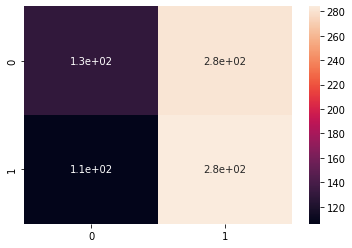

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.31      0.40       410
           1       0.50      0.73      0.59       390

    accuracy                           0.52       800
   macro avg       0.53      0.52      0.50       800
weighted avg       0.53      0.52      0.49       800



### TF-IDF Model

In [17]:
# TF-IDF
tfidf= TfidfVectorizer(ngram_range=(2,2))
traindataset= tfidf.fit_transform(train_headlines)

In [18]:
naive.fit(traindataset,train['Label'])

MultinomialNB()

In [19]:
predictions= naive.predict(test_dataset)

<AxesSubplot:>

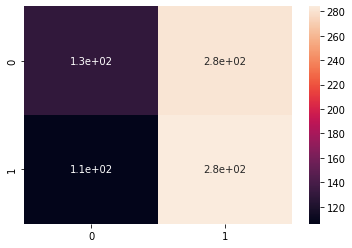

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.31      0.40       410
           1       0.50      0.73      0.59       390

    accuracy                           0.52       800
   macro avg       0.53      0.52      0.50       800
weighted avg       0.53      0.52      0.49       800



## Conclusion

Unfortunately, we haven't found significant value using the Naive Bayes approach. It might be because the news is too general or the selected information doesn't influence the stock nature.
But the good point is that we've implemented an easy classifier without spending much time checking our hypothesis.